# Projeto - Algoritmos de Inteligência Artificial para classificação

Docente: Ícaro Augusto Maccari Zelioli 

Author: Alexandre José Messias de Lara

## 1. Comprovante de finalização do módulo [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)

Descrição: Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 

Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

![Certificado de conclusão Kaggle Intro To Machine Learning - Alexandre Lara](assets/2025-02-18%20certificate%20kaggle%20intro%20to%20machine%20learning.png)

# 2. Carregamento da base

Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

----------------

Explicação do problema a ser resolvido:

Inicialmente, devemos obter a base de dados que contém vinhos brancos e tintos. Cada vinho possui uma nota correspondente à ele na variável `quality`. Quando a `quality` for menor ou igual a 5, devemos atribuir o valor `0` a uma nova variável `opinion`, caso contrário deverá ser atribuído o valor 1. A base utilizada no treinamento, deve conter somente a vinhos brancos. Devemos realizar o treinamento com 3 modelos de classificação: Regressão Logística, Árvore de Decisão e SVM. Devemos analisar as métricas de cada modelo e fazer a comparação entre eles, selecionando aquele que obtiver o melhor resultado, ou seja, que é capaz de realizar uma melhor separação entre vinhos de boa qualidade (classe 1) e de não tão boa qualidade (classe 0). Por fim, devemos utilizar o mesmo modelo para inferir o conjunto de dados dos vinhos tintos, realizar comparações e análises para entender se o modelo pode ser utilizado da mesma forma em ambas as bases.

### Instalação das dependências

As dependências necessárias são instaladas abaixo:

In [1]:
!uv add pandas
!uv add numpy
!uv add seaborn
!uv add matplotlib
!uv add scikit-learn

Resolved 50 packages in 3ms
Audited 19 packages in 0.62ms
Resolved 50 packages in 0.36ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.37ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.40ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.38ms
Audited 19 packages in 0.04ms


### Importação das dependências

Para dar início no processo de criação do modelo, todas as dependências do projeto são importadas.

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings

In [3]:
warnings.filterwarnings('ignore')

Os dados se encontram na pasta `data`. A biblioteca `pandas` é utilizada para poder fazer a leitura do arquivo `csv` e a criação do dataframe.

In [4]:
wine_data_csv_file_path = os.path.join('data', 'winequalityN.csv')
wine_data = pd.read_csv(wine_data_csv_file_path)

wine_data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

### Modificação dos nomes das colunas

Para facilitar a manipulação futura dos dados é efetuada uma modificação no nome das colunas que compõem o dataframe com a finalidade de substituir espaços por 'underscores' e deixar tudo em caracteres minúsculos.

In [5]:
wine_data.columns = wine_data.columns.str.replace(' ', '_').str.lower()
wine_data.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Criação da variável 'opinion'

O exercício solicita que uma variável categórica "opinion" seja criada com base na variável "quality".

- O valor de opinion é 0, quando quality for menor ou igual a 5.
- O valor de opinion é 1, quando quality for maior que 5.

In [6]:
wine_data["opinion"] = np.where(wine_data["quality"] <= 5, 0, 1)

# 3. Definição das variáveis, médias e desvios padrões

Descrição da questão: Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

Visualização das variáveis:

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  opinion               6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


Com base na análise realizada no dataset, as variáveis se dividem em:
- Categóricas: type, opinion
- Contínua: fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol
- Discreta: quality

### Obtenção das médias e desvios padrões de cada variável.

- mean: corresponde as médias
- std: corresponde aos desvios padrões

In [8]:
wine_data.drop(columns=["opinion"]).describe().loc[["mean", "std"]]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
mean       7.216579          0.339691     0.318722        5.444326   0.056042   
std        1.296750          0.164649     0.145265        4.758125   0.035036   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
mean            30.525319            115.744574  0.994697  3.218395   
std             17.749400             56.521855  0.002999  0.160748   

      sulphates    alcohol   quality  
mean   0.531215  10.491801  5.818378  
std    0.148814   1.192712  0.873255

# 4. Criação de modelo de classificação

Com a base escolhida:

a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

1. Obtenção, carregamento e compreensão dos dados.

    Uma vez que a base foi baixada, é necessário carregá-la de forma que nos permita manipulá-la. Neste projeto, estaremos utilizando a biblioteca `pandas`, que será responsável por ler a base que contém variantes de vinhos brancos e tintos do "Vinho Verde" português.

    Podemos utilizar comandos como `data.head()`, `data.info()` e `data.describe()` para entender mais sobre os dados, sua quantidade, médias, desvios padrões, variáveis, tipos de variáveis, etc.

    Devemos levar em consideração um levantamento de requisitos para a solução que estamos trabalhando, identificando o problema, os dados disponíveis e os objetivos que queremos alcançar.

2. Tratamento de dados

    Uma vez que temos uma compreensão dos dados, podemos avaliar se existem dados faltantes e tratá-los corretamente, seja com o preenchimento ou a remoção das linhas com dados faltantes. Podemos identificar outliers e decidir o que faremos com eles, por exemplo, removendo-os da base e sempre lembrando de documentar isso no projeto. Podemos também realizar o tratamento do nome de colunas para facilitar a manipulação.

3. Exploração e análise de dados

    Nesta etapa, podemos realizar uma análise do balanceamento de classes, para podermos determinar se estaremos trabalhando com uma base balanceada ou não. Entender isso é importante até para a escolha da métrica de avaliação, por exemplo: a acurácia não funciona bem para bases desbalanceadas.

    Podemos também efetuar a análise de separabilidade linear, buscando identificar se existem variáveis que nos possível separar o dataset linearmente. É importante destacar que a regressão linear é semelhante à separabilidade linear, porém na regresão a gente está buscando prever um valor contínuo que melhor separa um grupo de dados, enquanto que na separabilidade linear a ideia é tentar classificar os dados em categorias discretas, por exemplo, no problema deste projeto seria em "1" (para um vinho de boa qualidade) e "0" para um vinho que não é de boa qualidade.

    Devemos também selecionar as variáveis numéricas e analisar a necessidade de tratar variáveis categóricas.

4. Divisão dos dados

    Existe uma necessidade de separar os dados em conjuntos de treino e de teste para evitar overfitting e avaliar erros de generalização. Nesta etapa, é comum fazermos a amostragem estratificada para que as proporções sejam mantidas entre as diferentes classes, isso evita que uma classe que contenha poucos dados fique sub-representada quando faz a separação dos conjuntos de treino e teste.

5. Pré-processamento e Treinamento

    Podemos fazer o pré-processamento dos dados, por exemplo aplicando métodos para escalonamento dos dados (tais como: normalização, padronização e padronização robusta).
    
    Uma vez que escolhemos o modelo de classificação que desejamos utilizar (Regressão Logística, Árvore de Decisão, SVM, etc) devemos realizar o treinamento do modelo. Iniciamos criando um modelo base para fins de comparação de desempenho, é comum chamarmos esse modelo de "baseline". 

    Usando técnicas como Grid Search e Random Search podemos fazer o ajuste dos hiperparâmetros. Fazemos uso de validação cruzada a fim de evitar overfitting.

6. Avaliação do modelo

    Uma vez que o modelo foi treinado no conjunto de treino, devemos fazer a previsão no conjunto de teste e fazermos a avaliação do modelo por meio de métricas. Para isso, podemos avaliar as métricas estatísticas: acurácia, precisão, recall, f1-score e plotar a matriz de confusão. Outra opção é avaliar as métricas de negócio, que leva em conta parâmetros do negócio para avaliar o desempenho do modelo. Também podemos utilizar métricas complementares como curva precision x recall, curva ROC e AUC-ROC.

7. Implementação, monitoramento e otimização

    Uma vez validado o modelo, pode-se fazer a integração com um sistema real, devemos sempre estar monitorando o desempenho e realizando o re-treinamento quando necessário, além de avaliar se serão necessários continuar fazendo ajustes.



### Preparando os dados

Análise dos valores nulos

In [9]:
wine_data.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
ph                       9
sulphates                4
alcohol                  0
quality                  0
opinion                  0
dtype: int64

#### Realizando a limpeza dos valores nulos

A quantidade de linhas com dados faltantes é bem pequena em relação à amostragem total da base de dados, em razão disto, as linhas com valores nulos serão removidas.

In [10]:
wine_data.dropna(inplace=True)

wine_data.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
opinion                 0
dtype: int64

#### Separação da base de vinhos brancos e tintos

In [11]:
# Contagem do total de vinhos de cada tipo
print("\n📊 Contagem total de vinhos:")
print(wine_data["type"].value_counts())
print("-"*50)

# Separação dos vinhos brancos e tintos
white_wine_data = wine_data[wine_data["type"] == "white"]
red_wine_data = wine_data[wine_data["type"] == "red"]

# Certificando que a quantidade de vinhos brancos é a mesma
print("🍾 Vinhos Brancos:")
print(white_wine_data["type"].value_counts())
print("-"*50)

# Certificando que a quantidade de vinhos tintos é a mesma
print("🍷 Vinhos Tintos:")
print(red_wine_data["type"].value_counts())
print("-"*50)


📊 Contagem total de vinhos:
type
white    4870
red      1593
Name: count, dtype: int64
--------------------------------------------------
🍾 Vinhos Brancos:
type
white    4870
Name: count, dtype: int64
--------------------------------------------------
🍷 Vinhos Tintos:
type
red    1593
Name: count, dtype: int64
--------------------------------------------------


- Removendo a variável "quality" que deve ser desconsiderada para a criação do modelo.
- Removendo a variável "type" considerando que já houve a separação com base no tipo de vinho (branco ou tinto)

In [12]:
white_wine_data.drop(columns=["quality", "type"], inplace=True)

In [233]:
red_wine_data.drop(columns=["quality", "type"], inplace=True)

In [13]:
white_wine_data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  opinion  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1

#### Análise de separabilidade linear

Devemos verificar se existem variáveis que permitem separar linearmente o dataset. Se houvesse a viabilidade de realizar uma separação linear, pode ser que somente a existência de uma condicional fosse suficiente, sem a necessidade de criação de um modelo mais complexo.

Avaliação da distribuição de classes

In [14]:
white_wine_data['opinion'].value_counts()

opinion
1    3240
0    1630
Name: count, dtype: int64

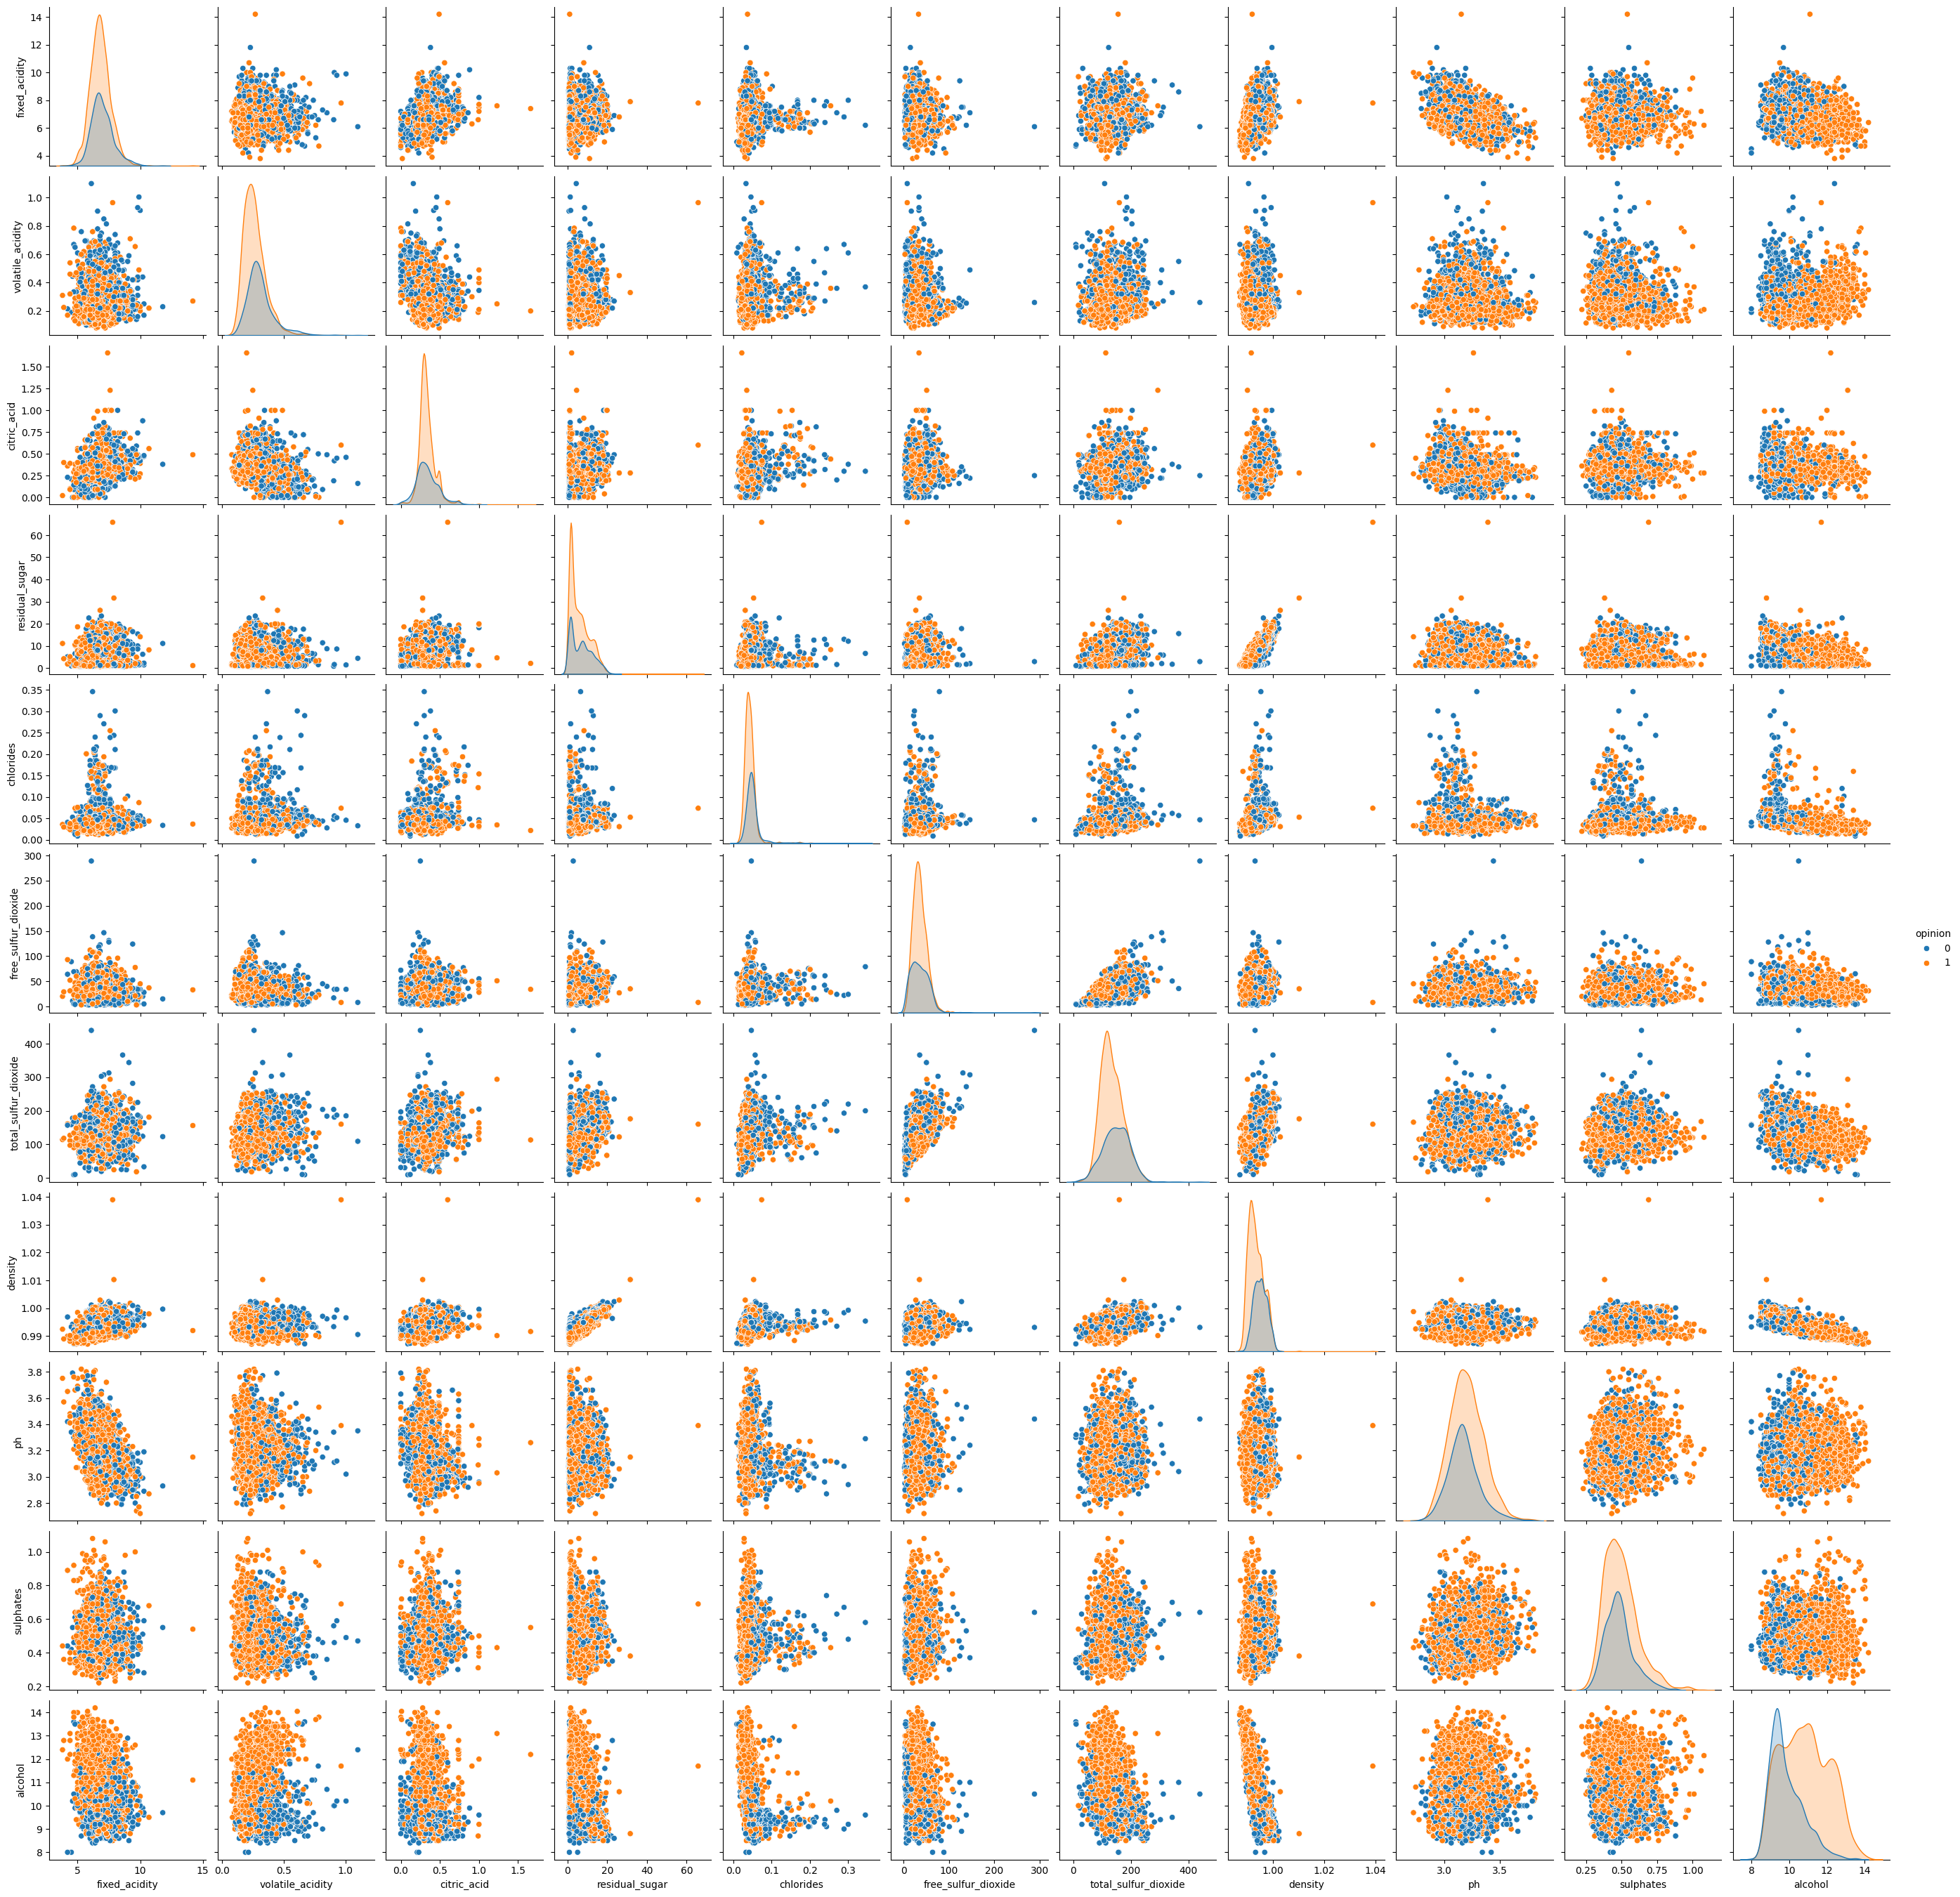

In [15]:
sns.pairplot(data=white_wine_data, hue='opinion')

Com base na observação visual dos pares de variáveis plotados acima, não é possível definir que o dataset pode ser separado linearmente considerando os diferentes pares de variáveis.

#### Separação treino e teste

Os dados são separados entre treino e teste. Os dados de teste corresponderão a 30% do total de dados. A divisão estratificada é realizada para garantir que cada classe da variável alvo esteja na mesma proporção nos conjuntos de teste e de treino, ainda mais considerando que a nossa base de dados é desbalanceada (contendo mais amostras de classe 1 do que 0).

In [16]:
target = 'opinion'
X = white_wine_data.drop(columns=[target])
y = white_wine_data[[target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Realizando a análise de proporções

Dados totais:


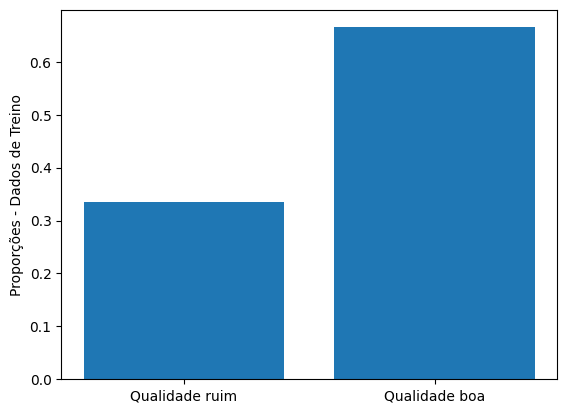

Dados de treino:


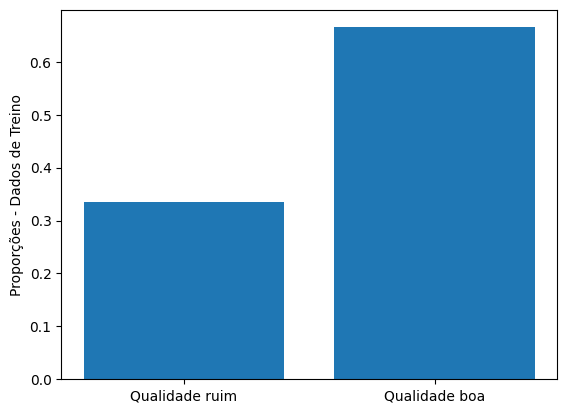

Dados de teste:


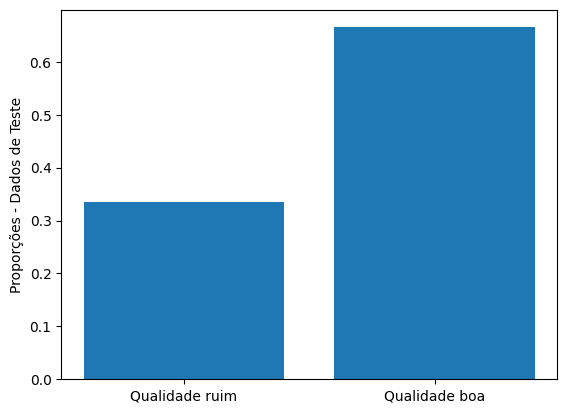

In [17]:
# análise de proporções
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

print("Dados totais:")

props = y_train[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Treino')
plt.show()

print("Dados de treino:")

props = y_train[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Treino')
plt.show()

print("Dados de teste:")

props = y_test[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Teste')
plt.show()

#### Criação do modelo baseline

O modelo baseline tem como hipótese de que todos os vinhos são de qualidade e portanto pertencem à classe 1.

In [141]:
y_base = np.repeat(1, repeats=len(y_test))

# Obtendo as métricas do modelo baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.67      1.00      0.80       972

    accuracy                           0.67      1461
   macro avg       0.33      0.50      0.40      1461
weighted avg       0.44      0.67      0.53      1461



Realizando a avaliação de grandezas

- Esta é uma etapa interessante para entender de que existem dados com grandezas diferentes no dataset, o que será importante para o processo de escalonamento de dados.

In [142]:
X_train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
136             8.2              0.23         0.40            1.20      0.027   
1519            8.3              0.20         0.49            1.70      0.040   
1642            7.3              0.19         0.49           15.55      0.058   
1369            7.4              0.64         0.47           14.15      0.168   
193             6.6              0.15         0.34            5.10      0.055   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
136                  36.0                 121.0   0.9920  3.12       0.38   
1519                 34.0                 169.0   0.9938  3.05       0.37   
1642                 50.0                 134.0   0.9998  3.42       0.36   
1369                 42.0                 185.0   0.9984  2.90       0.49   
193                  34.0                 125.0   0.9942  3.36       0.42   

      alcohol  
136      10.7  
1519     10.1  
1642      9.1  
1369      9.3  
193       9.6

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3409 entries, 136 to 4143
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3409 non-null   float64
 1   volatile_acidity      3409 non-null   float64
 2   citric_acid           3409 non-null   float64
 3   residual_sugar        3409 non-null   float64
 4   chlorides             3409 non-null   float64
 5   free_sulfur_dioxide   3409 non-null   float64
 6   total_sulfur_dioxide  3409 non-null   float64
 7   density               3409 non-null   float64
 8   ph                    3409 non-null   float64
 9   sulphates             3409 non-null   float64
 10  alcohol               3409 non-null   float64
dtypes: float64(11)
memory usage: 319.6 KB


Definindo as colunas numéricas
- No caso do dataset de vinhos, todas as variáveis são numéricas. 

In [144]:
# Obtendo as colunas numéricas
numeric_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']

# Criando pipeline de processamento
pre_processor = ColumnTransformer(
    [
        ('numeric', RobustScaler(), numeric_features)
    ]
)

Configurando o gerador de amostragem estratificada

In [145]:
k_folds = 10
splitter = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

Definindo múltiplas métricas para poder avaliar cada modelo posteriormente.

Importante destacar que para as métricas de precisão, recall e F1-Score está sendo considerada a média ponderada.

In [146]:
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

Criando uma função utilitária para poder imprimir os scores de cada modelo

In [147]:
def print_cv_results_metrics(cv_results, metric):
    metrics = ["accuracy", "precision", "recall", "f1"]

    if metric not in metrics:
        raise ValueError(f"Invalid metric. Please choose one of the following: {metrics}")
    
    print(f"{metric.capitalize()} - Média de cada split: ", cv_results[f"mean_test_{metric}"])
    print()
    print(f"{metric.capitalize()} - Desvio padrão de cada split: ", cv_results[f"std_test_{metric}"])
    print()

    mean_score = np.mean(cv_results[f"mean_test_{metric}"])
    std_score = np.std(cv_results[f"mean_test_{metric}"])
    print(f"{metric.capitalize()} - Média das médias de cada split: {mean_score:.4f}")
    print(f"{metric.capitalize()} - Média dos desvios padrões de cada split: {np.mean(cv_results[f"std_test_{metric}"]):.4f}")
    print(f"{metric.capitalize()} - Desvio Padrão das médias de cada split: {std_score:.4f}")
    print()
    print("-"*50)

##### Validação cruzada
Iremos utilizar a técnica de validação cruzada no treinamento dos modelos. Esta técnica consiste em ao invés de dividir os dados apenas em um conjunto de teste e conjunto de treino, também divide os dados em vários partes (chamados de `folds`), dessa forma o treinamento é feito em cada uma dessas partes, o que reduz o risco de overfitting. No caso desse projeto, utilizaremos 10 folds, ou seja os dados se dividem em 10 partes, cada fold é usado para o treinamento, enquanto que o restante dos dados fica como teste. O processo é repetido para cada fold e no final são calculados as métricas médias, que a gente pode acessar para poder analisar posteriormente.

b) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Sobre regressão linear x logística

Na regressão linear temos que a relação entre as variáveis é continua e reta. No caso da regressão logística, é utilizada uma função sigmoide que irá mapear os valores para um intervalo entre 0 e 1. Com base no limiar de decisão, será classificado em um valor discreto, por exemplo: se o vinho é de boa qualidade (1) ou não (0).

Criando a pipeline da regressão logística com modelo de validação cruzada estratificada com k-folds (k=10)

In [148]:
logistic_regression_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', LogisticRegression(solver='saga'))
])

Configurando o espaço de busca a regressão logística

In [149]:
param_grid_logistic_regression = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.25, 0.5, 0.75],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

Configura busca aleatória para a regressão logística

In [150]:
random_search_logistic_regression = RandomizedSearchCV(
    estimator=logistic_regression_pipeline,
    param_distributions=param_grid_logistic_regression,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit="f1",
    error_score=0,
    random_state=42,
    n_jobs=-1
)

Realizando a busca dos melhores parâmetros para a Regressão Logística

In [151]:
random_search_logistic_regression.fit(X_train, y_train)

/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                                        'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Calculando as métricas para o modelo de Regressão Logística

In [152]:
yhat_logistic_regression_test = random_search_logistic_regression.best_estimator_.predict(X_test)
yhat_logistic_regression_train = random_search_logistic_regression.best_estimator_.predict(X_train)

# Extraindo os resultados da validação cruzada
cv_results_logistic_regression = random_search_logistic_regression.cv_results_

Obtendo melhores métricas - Regressão Logística

In [153]:
print('Melhores parâmetros:', random_search_logistic_regression.best_params_)
print('Melhor score:', random_search_logistic_regression.best_score_)

Melhores parâmetros: {'selector__k': 9, 'model__penalty': 'l2', 'model__l1_ratio': 0.75, 'model__class_weight': None, 'model__C': 10}
Melhor score: 0.7453323796384087


Análise de desempenho entre base treino e base teste

In [154]:
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_logistic_regression_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_logistic_regression_test))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1141
           1       0.78      0.88      0.83      2268

    accuracy                           0.76      3409
   macro avg       0.73      0.69      0.70      3409
weighted avg       0.75      0.76      0.75      3409

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.67      0.46      0.55       489
           1       0.77      0.89      0.82       972

    accuracy                           0.75      1461
   macro avg       0.72      0.68      0.69      1461
weighted avg       0.74      0.75      0.73      1461



Obtendo métricas de acurácia

In [155]:
print_cv_results_metrics(cv_results_logistic_regression, 'accuracy')

Accuracy - Média de cada split:  [0.75623685 0.74802915 0.59921856 0.75477143 0.70695618 0.69903743
 0.70342936 0.71134984 0.6694109  0.7477359  0.67087373 0.49980507
 0.4670571  0.75477057 0.66823098 0.66529757 0.70929619 0.71487321
 0.71809815 0.73600224 0.67087545 0.75213386 0.75242971 0.70636536
 0.46666724 0.71692513 0.75477575 0.67087373 0.71809815 0.71809815
 0.69903743 0.75448335 0.75184233 0.71692513 0.73717785 0.71311282
 0.7321882  0.67087373 0.669404   0.75184233 0.71399431 0.56588408
 0.75623685 0.71370105 0.69903743 0.70430999 0.71134984 0.71605227
 0.46725375 0.70342936]

Accuracy - Desvio padrão de cada split:  [0.01707549 0.01905335 0.13221107 0.01719681 0.01784361 0.02054345
 0.0155386  0.01356679 0.01615381 0.01898679 0.01719087 0.16529988
 0.16198412 0.01710738 0.01619376 0.00089629 0.01751499 0.01397182
 0.01594097 0.01509443 0.0112976  0.01671155 0.01753524 0.01445361
 0.16190434 0.01439218 0.01627209 0.01719087 0.01594097 0.01594097
 0.02054345 0.01805807 0.01573

Obtendo métricas de precisão - Regressão logística

In [156]:
print_cv_results_metrics(cv_results_logistic_regression, 'precision')

Precision - Média de cada split:  [0.74813107 0.73870594 0.37654265 0.74652722 0.73531737 0.68452921
 0.73765657 0.74117611 0.63496078 0.73838943 0.7186967  0.27712916
 0.24438119 0.74657023 0.71825231 0.44262166 0.74050889 0.74707462
 0.74924994 0.73170254 0.63588156 0.74340042 0.74390073 0.73897005
 0.24399133 0.75109665 0.74670647 0.7186967  0.74924994 0.74924994
 0.68452921 0.74636193 0.74321589 0.75068516 0.73401343 0.74691874
 0.72529733 0.7186967  0.7181455  0.74321589 0.74634732 0.34320817
 0.74813107 0.74617791 0.68452921 0.73826034 0.74117611 0.73767476
 0.24457784 0.73765657]

Precision - Desvio padrão de cada split:  [0.01910658 0.02139468 0.13222996 0.01922569 0.01674507 0.02420042
 0.01477613 0.01377436 0.02452436 0.02131261 0.01631856 0.16523751
 0.16202193 0.01916251 0.01615443 0.0011908  0.0156405  0.01637757
 0.01632122 0.01861496 0.01775921 0.01867852 0.0195486  0.01447866
 0.16181429 0.0133301  0.01790794 0.01631856 0.01632122 0.01632122
 0.02420042 0.01946286 0.017

Obtendo métricas de recall - Regressão logística

In [157]:
print_cv_results_metrics(cv_results_logistic_regression, 'recall')

Recall - Média de cada split:  [0.75623685 0.74802915 0.59921856 0.75477143 0.70695618 0.69903743
 0.70342936 0.71134984 0.6694109  0.7477359  0.67087373 0.49980507
 0.4670571  0.75477057 0.66823098 0.66529757 0.70929619 0.71487321
 0.71809815 0.73600224 0.67087545 0.75213386 0.75242971 0.70636536
 0.46666724 0.71692513 0.75477575 0.67087373 0.71809815 0.71809815
 0.69903743 0.75448335 0.75184233 0.71692513 0.73717785 0.71311282
 0.7321882  0.67087373 0.669404   0.75184233 0.71399431 0.56588408
 0.75623685 0.71370105 0.69903743 0.70430999 0.71134984 0.71605227
 0.46725375 0.70342936]

Recall - Desvio padrão de cada split:  [0.01707549 0.01905335 0.13221107 0.01719681 0.01784361 0.02054345
 0.0155386  0.01356679 0.01615381 0.01898679 0.01719087 0.16529988
 0.16198412 0.01710738 0.01619376 0.00089629 0.01751499 0.01397182
 0.01594097 0.01509443 0.0112976  0.01671155 0.01753524 0.01445361
 0.16190434 0.01439218 0.01627209 0.01719087 0.01594097 0.01594097
 0.02054345 0.01805807 0.01573304 

Obtendo métricas de F1-score - Regressão Logística

In [158]:
print_cv_results_metrics(cv_results_logistic_regression, 'f1')

F1 - Média de cada split:  [0.74533238 0.73629078 0.45888211 0.74432066 0.7136452  0.6861372
 0.71084729 0.71823382 0.62195824 0.73583196 0.67999336 0.3495142
 0.31347876 0.74388829 0.67742276 0.53158205 0.71625954 0.72196066
 0.72502041 0.70562555 0.61290055 0.7393379  0.74100239 0.71360074
 0.31305822 0.72412846 0.74409153 0.67999336 0.72502041 0.72502041
 0.6861372  0.74421512 0.73959648 0.72408624 0.70627662 0.72043882
 0.7027927  0.67999336 0.6785527  0.73959648 0.72110225 0.42221413
 0.74533238 0.72082102 0.6861372  0.71165338 0.71823382 0.72175548
 0.31369077 0.71084729]

F1 - Desvio padrão de cada split:  [0.02008388 0.02223471 0.14546831 0.02009156 0.01722084 0.02340737
 0.01491132 0.01298855 0.01925323 0.02214899 0.01675065 0.18182209
 0.17823446 0.01970781 0.01579009 0.00114541 0.01671915 0.01344462
 0.01532274 0.0194844  0.0144831  0.02046412 0.01993    0.0138818
 0.17807078 0.01381322 0.01856533 0.01675065 0.01532274 0.01532274
 0.02340737 0.01962632 0.01783733 0.01224526 


c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Criando a pipeline da Árvore de Decisão com modelo de validação cruzada estratificada com k-folds (k=10)

In [159]:
decision_tree_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', DecisionTreeClassifier(random_state=42))
])

Configurando o espaço de busca a Árvore de Decisão

In [160]:
param_grid_decision_tree = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(2, 11),
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

Configura busca aleatória para a Árvore de Decisão

In [161]:
random_search_decision_tree = RandomizedSearchCV(
    estimator=decision_tree_pipeline,
    param_distributions=param_grid_decision_tree,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit='f1',
    error_score=0,
    random_state=42,
    n_jobs=-1
)

Realizando a busca dos melhores parâmetros para a Árvore de Decisão

In [162]:
random_search_decision_tree.fit(X_train, y_train)

/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                                        'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Calculando as métricas para a Árvore de decisão

In [163]:
yhat_decision_tree_test = random_search_decision_tree.best_estimator_.predict(X_test)
yhat_decision_tree_train = random_search_decision_tree.best_estimator_.predict(X_train)

# Extraindo os resultados da validação cruzada
cv_results_decision_tree = random_search_decision_tree.cv_results_


Análise de desempenho entre base treino e base teste - Árvore de Decisão

In [180]:
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_decision_tree_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_decision_tree_test))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1141
           1       0.89      0.87      0.88      2268

    accuracy                           0.84      3409
   macro avg       0.82      0.83      0.83      3409
weighted avg       0.85      0.84      0.84      3409

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       489
           1       0.82      0.82      0.82       972

    accuracy                           0.77      1461
   macro avg       0.74      0.74      0.74      1461
weighted avg       0.77      0.77      0.77      1461



Obtendo melhores métricas - Árvore de Decisão

In [179]:
print('Melhores parâmetros:', random_search_decision_tree.best_params_)
print('Melhor score:', random_search_decision_tree.best_score_)

Melhores parâmetros: {'selector__k': 10, 'model__max_depth': 8, 'model__criterion': 'entropy', 'model__class_weight': None}
Melhor score: 0.7616007208592745


Obtendo métricas de acurácia - Árvore de Decisão

In [164]:
print_cv_results_metrics(cv_results_decision_tree, 'accuracy')

Accuracy - Média de cada split:  [0.75682336 0.73042091 0.73776264 0.75213386 0.73541142 0.73512334
 0.72777299 0.73277299 0.75535622 0.73248059 0.73188718 0.74890374
 0.68582198 0.76415819 0.72719941 0.719862   0.74744437 0.68523547
 0.72661032 0.75418665 0.64475936 0.75477575 0.75418579 0.72719769
 0.73980766 0.69198982 0.72220718 0.74451354 0.71693635 0.72894859
 0.75710799 0.73188373 0.74684923 0.71661722 0.72544161 0.74332586
 0.72397706 0.70929964 0.72953855 0.61630671 0.69785147 0.65063222
 0.74919614 0.72513973 0.72162412 0.75154735 0.72983353 0.73217785
 0.72483871 0.75007849]

Accuracy - Desvio padrão de cada split:  [0.01747604 0.01589965 0.02329887 0.02650262 0.02115895 0.02584148
 0.02725716 0.02050688 0.01676563 0.0201732  0.02480949 0.02461002
 0.02503125 0.01764561 0.0273539  0.02610913 0.02208809 0.02449401
 0.02611401 0.02453825 0.01531273 0.02435765 0.01981516 0.01938566
 0.02161529 0.02319031 0.02220306 0.02309494 0.02723294 0.02096514
 0.01982256 0.0266831  0.01981

Obtendo métricas de precisão - Árvore de Decisão

In [165]:
print_cv_results_metrics(cv_results_decision_tree, 'precision')

Precision - Média de cada split:  [0.75387003 0.75453784 0.72900225 0.74779791 0.75834578 0.73777006
 0.74784115 0.75272845 0.75235464 0.75302231 0.75222386 0.74824966
 0.67543706 0.76083099 0.75807937 0.74615875 0.74684755 0.67530582
 0.75613387 0.7535207  0.71316723 0.74965009 0.74854106 0.74909821
 0.73642942 0.67919408 0.75164295 0.74097259 0.7517786  0.74810212
 0.75422916 0.7537129  0.74736515 0.74541002 0.74530789 0.76538949
 0.74791401 0.70239691 0.74136602 0.73675777 0.70309857 0.7066161
 0.74810058 0.74584484 0.74249262 0.74650484 0.75057921 0.7488901
 0.74702145 0.74659836]

Precision - Desvio padrão de cada split:  [0.01806696 0.01843759 0.02564176 0.02581049 0.02038583 0.02453447
 0.02242661 0.01590189 0.01759412 0.02096023 0.02236913 0.02744463
 0.0277334  0.01801916 0.02291998 0.02279784 0.02057584 0.02760618
 0.02105707 0.02310615 0.01412161 0.02529668 0.02124276 0.02133746
 0.02039471 0.02718665 0.01665263 0.02410528 0.01760757 0.0216922
 0.01953082 0.02499138 0.017399

Obtendo métricas de recall - Árvore de decisão

In [166]:
print_cv_results_metrics(cv_results_decision_tree, 'recall')

Recall - Média de cada split:  [0.75682336 0.73042091 0.73776264 0.75213386 0.73541142 0.73512334
 0.72777299 0.73277299 0.75535622 0.73248059 0.73188718 0.74890374
 0.68582198 0.76415819 0.72719941 0.719862   0.74744437 0.68523547
 0.72661032 0.75418665 0.64475936 0.75477575 0.75418579 0.72719769
 0.73980766 0.69198982 0.72220718 0.74451354 0.71693635 0.72894859
 0.75710799 0.73188373 0.74684923 0.71661722 0.72544161 0.74332586
 0.72397706 0.70929964 0.72953855 0.61630671 0.69785147 0.65063222
 0.74919614 0.72513973 0.72162412 0.75154735 0.72983353 0.73217785
 0.72483871 0.75007849]

Recall - Desvio padrão de cada split:  [0.01747604 0.01589965 0.02329887 0.02650262 0.02115895 0.02584148
 0.02725716 0.02050688 0.01676563 0.0201732  0.02480949 0.02461002
 0.02503125 0.01764561 0.0273539  0.02610913 0.02208809 0.02449401
 0.02611401 0.02453825 0.01531273 0.02435765 0.01981516 0.01938566
 0.02161529 0.02319031 0.02220306 0.02309494 0.02723294 0.02096514
 0.01982256 0.0266831  0.01981464 

Obtendo métricas de F1-Score - Árvore de decisão

In [167]:
print_cv_results_metrics(cv_results_decision_tree, 'f1')

F1 - Média de cada split:  [0.75365869 0.73598056 0.72556757 0.74481741 0.74070045 0.73368325
 0.73320914 0.73794815 0.75326167 0.73774571 0.73700926 0.74726143
 0.67547513 0.76160072 0.73377385 0.72592301 0.74584931 0.67508008
 0.73291843 0.75306002 0.65401443 0.74982739 0.74889659 0.73251677
 0.73526084 0.68048713 0.72884786 0.74018107 0.72390273 0.73421732
 0.75473073 0.73739332 0.74666872 0.72293467 0.73042595 0.74796061
 0.72920012 0.70403611 0.73260728 0.62053811 0.69920122 0.65921673
 0.74785793 0.73063879 0.72717547 0.74745195 0.73496439 0.73702468
 0.7298906  0.74711518]

F1 - Desvio padrão de cada split:  [0.01767629 0.01501839 0.02469402 0.0268338  0.01969415 0.02425359
 0.02597341 0.01930566 0.01721647 0.01967964 0.0236358  0.02547019
 0.02565036 0.01758652 0.02622055 0.02501851 0.02133239 0.0256317
 0.02493054 0.02373287 0.01550637 0.02534481 0.02125846 0.0187354
 0.02173532 0.02543181 0.0210222  0.02382631 0.02570723 0.02067295
 0.01907408 0.02574336 0.01847822 0.02765084

d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Criando a pipeline da SVM com modelo de validação cruzada estratificada com k-folds (k=10)

In [189]:
svc_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', SVC(probability=True, random_state=42))
])

Configurando o espaço de busca da SVM

In [194]:
param_grid_svc = {
    'selector__k': range(1, 11),
    'model__kernel': ['rbf'],
    'model__C': np.random.uniform(0.01, 10, 20),
    'model__gamma': np.random.uniform(0.001, 1, 20),
    'model__degree': [2, 3],
}

Configura busca aleatória para a SVM

In [217]:
random_search_svc = RandomizedSearchCV(
    estimator=svc_pipeline,
    param_distributions=param_grid_svc,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit='f1',
    error_score=0,
    random_state=42,
    n_jobs=-1
)

Realizando a busca dos melhores parâmetros para a Árvore de Decisão

In [218]:
random_search_svc.fit(X_train, y_train)

/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandrelara/Documents/storage/c/code/project-algoritmos-de-ia-para-classificacao/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                                        'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

In [219]:
random_search_svc.best_params_

{'selector__k': 10,
 'model__kernel': 'rbf',
 'model__gamma': np.float64(0.2220119365764439),
 'model__degree': 2,
 'model__class_weight': None,
 'model__C': np.float64(2.8857366319302677)}

In [220]:
random_search_svc.best_score_

np.float64(0.78460324325802)

Calculando as métricas para o modelo SVM

In [221]:
yhat_svc_test = random_search_svc.best_estimator_.predict(X_test)
yhat_svc_train = random_search_svc.best_estimator_.predict(X_train)

# Extraindo os resultados da validação cruzada
cv_results_svc = random_search_svc.cv_results_

Análise de desempenho entre base treino e base teste

In [222]:
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_svc_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_svc_test))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1141
           1       0.87      0.90      0.88      2268

    accuracy                           0.84      3409
   macro avg       0.83      0.82      0.82      3409
weighted avg       0.84      0.84      0.84      3409

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       489
           1       0.81      0.87      0.84       972

    accuracy                           0.78      1461
   macro avg       0.75      0.73      0.74      1461
weighted avg       0.77      0.78      0.77      1461



Obtendo melhores métricas - Regressão Logística

In [223]:
print('Melhores parâmetros:', random_search_svc.best_params_)
print('Melhor score:', random_search_svc.best_score_)

Melhores parâmetros: {'selector__k': 10, 'model__kernel': 'rbf', 'model__gamma': np.float64(0.2220119365764439), 'model__degree': 2, 'model__class_weight': None, 'model__C': np.float64(2.8857366319302677)}
Melhor score: 0.78460324325802


Obtendo métricas de acurácia - SVM

In [224]:
print_cv_results_metrics(cv_results_svc, 'accuracy')

Accuracy - Média de cada split:  [0.7665025  0.6972779  0.77060635 0.74362343 0.65943074 0.77735812
 0.75975418 0.76678541 0.75390029 0.64681646 0.76356736 0.74274194
 0.76883992 0.75593497 0.68084785 0.76855874 0.76210022 0.75476971
 0.73658185 0.76385458 0.78879334 0.73364758 0.7688425  0.76062877
 0.75946352 0.74538813 0.76092634 0.64183026 0.753601   0.75330602
 0.75419441 0.75476885 0.73276436 0.65415129 0.75506555 0.76826203
 0.70226496 0.72865879 0.73599362 0.64652665 0.65913662 0.77237019
 0.72807055 0.77441694 0.77354494 0.75418665 0.76034242 0.69317233
 0.76121442 0.75506296 0.77589012 0.73599362 0.74831982 0.77353976
 0.75212696 0.75536743 0.73012765 0.7471468  0.73188632 0.76238399
 0.76269018 0.70372865 0.76444627 0.7641556  0.75213127 0.76972831
 0.75623685 0.73217958 0.70284716 0.77558996 0.72601691 0.69317233
 0.78322063 0.76562274 0.77148698 0.75506038 0.75390116 0.75243402
 0.69317233 0.75478092 0.77501208 0.65767121 0.76855701 0.75066327
 0.76033552 0.65268501 0.7659

Obtendo métricas de precisão - SVM

In [225]:
print_cv_results_metrics(cv_results_svc, 'precision')

Precision - Média de cada split:  [0.76040756 0.68992201 0.7650302  0.76559098 0.72237543 0.77416729
 0.77627499 0.7750254  0.74686775 0.72186826 0.75659721 0.76600501
 0.78278003 0.7689466  0.65696875 0.76189156 0.7548226  0.74805571
 0.75802896 0.7684366  0.78480751 0.75558016 0.78350307 0.77905256
 0.75221624 0.76841561 0.77585471 0.72423775 0.77892546 0.77818285
 0.74586605 0.7720622  0.76101283 0.72025801 0.77553807 0.76318867
 0.68446611 0.75159735 0.7584075  0.72114973 0.72086719 0.76586637
 0.75162186 0.78922158 0.7681473  0.74659634 0.7530118  0.67688666
 0.77398183 0.77527023 0.76968985 0.75781648 0.77323464 0.76889739
 0.77727145 0.74724285 0.75998829 0.76990389 0.75369008 0.76838219
 0.75556821 0.68616791 0.77943229 0.75766629 0.74425277 0.76432723
 0.74877331 0.75396037 0.68480496 0.77554851 0.75288847 0.67688666
 0.77946364 0.7597058  0.76876307 0.774612   0.74556731 0.74446578
 0.67688666 0.7464812  0.769746   0.72168867 0.76353269 0.7684791
 0.77827135 0.71914478 0.7690

Obtendo métricas de recall - SVM

In [226]:
print_cv_results_metrics(cv_results_svc, 'recall')

Recall - Média de cada split:  [0.7665025  0.6972779  0.77060635 0.74362343 0.65943074 0.77735812
 0.75975418 0.76678541 0.75390029 0.64681646 0.76356736 0.74274194
 0.76883992 0.75593497 0.68084785 0.76855874 0.76210022 0.75476971
 0.73658185 0.76385458 0.78879334 0.73364758 0.7688425  0.76062877
 0.75946352 0.74538813 0.76092634 0.64183026 0.753601   0.75330602
 0.75419441 0.75476885 0.73276436 0.65415129 0.75506555 0.76826203
 0.70226496 0.72865879 0.73599362 0.64652665 0.65913662 0.77237019
 0.72807055 0.77441694 0.77354494 0.75418665 0.76034242 0.69317233
 0.76121442 0.75506296 0.77589012 0.73599362 0.74831982 0.77353976
 0.75212696 0.75536743 0.73012765 0.7471468  0.73188632 0.76238399
 0.76269018 0.70372865 0.76444627 0.7641556  0.75213127 0.76972831
 0.75623685 0.73217958 0.70284716 0.77558996 0.72601691 0.69317233
 0.78322063 0.76562274 0.77148698 0.75506038 0.75390116 0.75243402
 0.69317233 0.75478092 0.77501208 0.65767121 0.76855701 0.75066327
 0.76033552 0.65268501 0.765906

Obtendo métricas de F1-Score - SVM

In [227]:
print_cv_results_metrics(cv_results_svc, 'f1')

F1 - Média de cada split:  [0.75599376 0.69153455 0.76387228 0.74904846 0.66875089 0.77410212
 0.76411718 0.76921747 0.73787051 0.65585996 0.75410199 0.74827496
 0.7727155  0.75971346 0.64784647 0.75941823 0.75272068 0.73766602
 0.74210088 0.7654159  0.78460324 0.73921447 0.7728117  0.76529252
 0.74910248 0.75102278 0.76511788 0.65035291 0.75912722 0.75875773
 0.74125028 0.75943532 0.73911021 0.66342856 0.75994559 0.7638429
 0.67501003 0.73433119 0.7415902  0.65552795 0.66849583 0.76464085
 0.73390773 0.77835912 0.76655018 0.73928197 0.74983523 0.67717379
 0.76478508 0.76001945 0.76830284 0.74151734 0.75403882 0.76954111
 0.75776045 0.7438953  0.7366885  0.75259079 0.73744264 0.76418071
 0.75264243 0.67029692 0.7684287  0.75478842 0.73907424 0.76431613
 0.74357613 0.73777158 0.66999914 0.77464612 0.73228221 0.67717379
 0.77976949 0.75797699 0.7688727  0.75987796 0.7408079  0.73741873
 0.67717379 0.74204901 0.76832395 0.66701554 0.7632698  0.75549449
 0.76493437 0.66196541 0.76707364 0.

# 5. Comparação entre modelos

Descrição do exercício: Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

Análise do melhor desempenho médio

In [228]:
# Melhor score - Regressão Logística
print('Melhor score - Regressão Logística')
print(random_search_logistic_regression.best_score_)
print('-'*50)

# Melhor score - Árvore de decisão
print('Melhor score - Árvore de decisão')
print(random_search_decision_tree.best_score_)
print('-'*50)

# Melhor score - SVM
print('Melhor score - SVM')
print(random_search_svc.best_score_)
print('-'*50)


Melhor score - Regressão Logística
0.7453323796384087
--------------------------------------------------
Melhor score - Árvore de decisão
0.7616007208592745
--------------------------------------------------
Melhor score - SVM
0.78460324325802
--------------------------------------------------


Análise das métricas de cada modelo

In [229]:
print('Regressão logística - Base de Treino')
print(classification_report(y_train, yhat_logistic_regression_train))

print('Regressão logística - Base de Teste')
print(classification_report(y_test, yhat_logistic_regression_test))

print('-'*50)

print('Árvore de Decisão - Base de Treino')
print(classification_report(y_train, yhat_decision_tree_train))

print('Árvore de Decisão - Base de Teste')
print(classification_report(y_test, yhat_decision_tree_test))

print('-'*50)

print('SVM - Base de Treino')
print(classification_report(y_train, yhat_svc_train))

print('SVM - Base de Teste')
print(classification_report(y_test, yhat_svc_test))

print('-'*50)



Regressão logística - Base de Treino
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1141
           1       0.78      0.88      0.83      2268

    accuracy                           0.76      3409
   macro avg       0.73      0.69      0.70      3409
weighted avg       0.75      0.76      0.75      3409

Regressão logística - Base de Teste
              precision    recall  f1-score   support

           0       0.67      0.46      0.55       489
           1       0.77      0.89      0.82       972

    accuracy                           0.75      1461
   macro avg       0.72      0.68      0.69      1461
weighted avg       0.74      0.75      0.73      1461

--------------------------------------------------
Árvore de Decisão - Base de Treino
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1141
           1       0.89      0.87      0.88      2268

    accuracy           

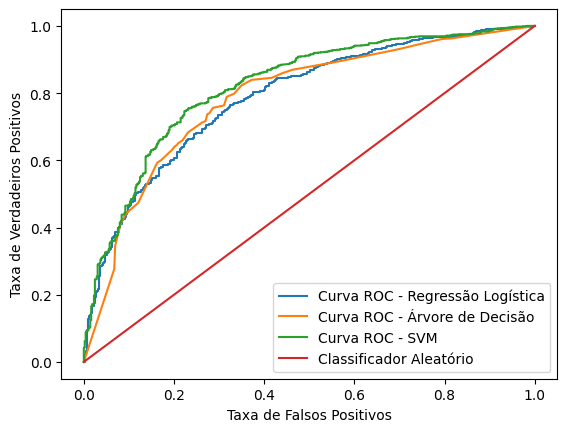

In [230]:
predicted_probabilities_logistic_regression = random_search_logistic_regression.best_estimator_.predict_proba(X_test)[:, 1]
predicted_probabilities_decision_tree = random_search_decision_tree.best_estimator_.predict_proba(X_test)[:, 1]
predicted_probabilities_svc = random_search_svc.best_estimator_.predict_proba(X_test)[:, 1]

fpr_logistic_regression, tpr_logistic_regression, _ = roc_curve(y_test, predicted_probabilities_logistic_regression)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, predicted_probabilities_decision_tree)
fpr_svc, tpr_svc, _ = roc_curve(y_test, predicted_probabilities_svc)

plt.plot(fpr_logistic_regression, tpr_logistic_regression, label='Curva ROC - Regressão Logística')
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Curva ROC - Árvore de Decisão')
plt.plot(fpr_svc, tpr_svc, label='Curva ROC - SVM')
plt.plot([0, 1], [0, 1], label='Classificador Aleatório')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()


Área abaixo da curva - AUC ROC

In [231]:
print('Área abaixo da curva - AUC ROC - Regressão Logística: ', roc_auc_score(y_test, predicted_probabilities_logistic_regression))

print('Área abaixo da curva - AUC ROC - Árvore de Decisão: ', roc_auc_score(y_test, predicted_probabilities_decision_tree))

print('Área abaixo da curva - AUC ROC - SVM: ', roc_auc_score(y_test, predicted_probabilities_svc))

Área abaixo da curva - AUC ROC - Regressão Logística:  0.7874388817356325
Área abaixo da curva - AUC ROC - Árvore de Decisão:  0.7866593871763151
Área abaixo da curva - AUC ROC - SVM:  0.8203585885362754


Com base na na análise das métricas de cada modelo, o modelo SVM se mostrou mais eficiente para a classificação dos vinhos brancos com base na variável alvo `opinion`. 

O modelo SVM:

  - É o modelo com melhor score entre os 3 modelos, tendo obtido um score de: ~0,7844, contra ~0,7453 da Regressão Logística e ~0,7616 da Árvore de decisão.
  - Pela análise da curva ROC, é possível notar que ela se encontra acima das demais curvas na maioria das regiões.
  - Ele também possui a maior AUC-ROC (~0.82) indicando haver uma melhor separação entre as classes.

# 6. Análise na base de dados de vinho tinto

Descrição do exercício: Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [232]:
red_wine_data

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
4898  red            7.4             0.700         0.00             1.9   
4899  red            7.8             0.880         0.00             2.6   
4900  red            7.8             0.760         0.04             2.3   
4901  red           11.2             0.280         0.56             1.9   
4902  red            7.4             0.700         0.00             1.9   
...   ...            ...               ...          ...             ...   
6491  red            6.8             0.620         0.08             1.9   
6492  red            6.2             0.600         0.08             2.0   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
4898      0.076                 11.0                  34.0  0.99780  3.51   
4899      0.098                 25.0                  67.0  0.99680  3.20   
4900      0.092                 15.0                  54.0  0.99700  3.26   
4901      0.075                 17.0                  60.0  0.99800  3.16   
4902      0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  opinion  
4898       0.56      9.4        5        0  
4899       0.68      9.8        5        0  
4900       0.65      9.8        5        0  
4901       0.58      9.8        6        1  
4902       0.56      9.4        5        0  
...         ...      ...      ...      ...  
6491       0.82      9.5        6        1  
6492       0.58     10.5        5        0  
6494       0.75     11.0        6        1  
6495       0.71     10.2        5        0  
6496       0.66     11.0        6        1  

[1593 rows x 14 columns]

Realizando a separação de treino e teste

In [241]:
target = 'opinion'
X_red_wine = red_wine_data.drop(columns=[target])
y_red_wine = red_wine_data[[target]]

X_train_red_wine, X_test_red_wine, y_train_red_wine, y_test_red_wine = train_test_split(X_red_wine, y_red_wine, test_size=0.3, random_state=42, stratify=y_red_wine)

yhat_svc_test_red_wine = random_search_svc.best_estimator_.predict(X_test_red_wine)
yhat_svc_train_red_wine = random_search_svc.best_estimator_.predict(X_train_red_wine)

# Extraindo os resultados da validação cruzada
cv_results_svc_red_wine = random_search_svc.cv_results_

Análise de distribuição de classes

In [256]:
white_wine_data.value_counts('opinion', normalize=True)

opinion
1    0.665298
0    0.334702
Name: proportion, dtype: float64

In [245]:
red_wine_data.value_counts('opinion', normalize=True)

opinion
1    0.534212
0    0.465788
Name: proportion, dtype: float64

In [253]:
print('White Wine - Desempenho SVM - Base de Treino')
print(classification_report(y_train, yhat_svc_train))

print('White Wine - Desempenho SVM - Base de Teste')
print(classification_report(y_test, yhat_svc_test))

print('-'*50)

White Wine - Desempenho SVM - Base de Treino
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1141
           1       0.87      0.90      0.88      2268

    accuracy                           0.84      3409
   macro avg       0.83      0.82      0.82      3409
weighted avg       0.84      0.84      0.84      3409

White Wine - Desempenho SVM - Base de Teste
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       489
           1       0.81      0.87      0.84       972

    accuracy                           0.78      1461
   macro avg       0.75      0.73      0.74      1461
weighted avg       0.77      0.78      0.77      1461

--------------------------------------------------


In [257]:
print('Red Wine - Desempenho SVM - Base de Treino')
print(classification_report(y_train_red_wine, yhat_svc_train_red_wine))

print('Red Wine - Modelo baseline - Base de Teste')
y_base_red_wine = np.repeat(1, repeats=len(y_test_red_wine))
print(classification_report(y_test_red_wine, y_base_red_wine))

print('Red Wine - Desempenho SVM - Base de Teste')
print(classification_report(y_test_red_wine, yhat_svc_test_red_wine))

Red Wine - Desempenho SVM - Base de Treino
              precision    recall  f1-score   support

           0       0.51      0.87      0.64       519
           1       0.69      0.27      0.38       596

    accuracy                           0.54      1115
   macro avg       0.60      0.57      0.51      1115
weighted avg       0.61      0.54      0.50      1115

Red Wine - Modelo baseline - Base de Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.53      1.00      0.70       255

    accuracy                           0.53       478
   macro avg       0.27      0.50      0.35       478
weighted avg       0.28      0.53      0.37       478

Red Wine - Desempenho SVM - Base de Teste
              precision    recall  f1-score   support

           0       0.51      0.91      0.66       223
           1       0.76      0.25      0.37       255

    accuracy                           0.56       478


Curva ROC - Modelo SVM para classificação dos vinhos tintos

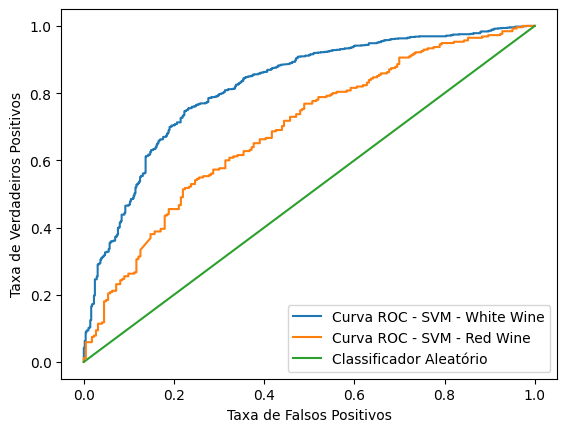

In [252]:
predicted_probabilities_svc_red_wine = random_search_svc.best_estimator_.predict_proba(X_test_red_wine)[:, 1]

fpr_svc_red_wine, tpr_svc_red_wine, _ = roc_curve(y_test_red_wine, predicted_probabilities_svc_red_wine)

plt.plot(fpr_svc, tpr_svc, label='Curva ROC - SVM - White Wine')
plt.plot(fpr_svc_red_wine, tpr_svc_red_wine, label='Curva ROC - SVM - Red Wine')
plt.plot([0, 1], [0, 1], label='Classificador Aleatório')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()


Análise Área abaixo da Curva ROC - AUC ROC

In [255]:
print('Área abaixo da curva - White Wine - AUC ROC - SVM: ', roc_auc_score(y_test, predicted_probabilities_svc))

print('Área abaixo da curva - Red Wine - AUC ROC - SVM: ', roc_auc_score(y_test_red_wine, predicted_probabilities_svc_red_wine))

Área abaixo da curva - White Wine - AUC ROC - SVM:  0.8203585885362754
Área abaixo da curva - Red Wine - AUC ROC - SVM:  0.6899410885430405


Ao utilizar o modelo SVM treinado na base de vinhos brancos sem realizar um novo treinamento, é possível notar que o modelo foi melhor na classificação de vinhos brancos e não performou tão bem na classificação de vinhos tintos, apesar de ter performado melhor do que o modelo baseline para a base de vinhos tintos. 

Podemos notar que a Curva ROC gerada na base de vinhos brancos permanece constantamente acima da curva gerada com a base de vinhos tintos. Além disso, o AUC ROC caiu de 0.82 para 0.69 para a base de vinhos tintos, o que demonstra que o modelo foi menos eficiente em separar corretamente as classes (separar os vinhos de boa qualidade, dos que não são de boa qualidade).

Uma coisa que é possível notar, é a diferença nas distribuições de classes do conjunto de vinhos brancos e de vinhos tintos. No conjunto de vinhos brancos há um maior desbalanceamento de classes do que no conjunto de vinhos brancos, essa diferença entre as bases de dados pode fazer com que o modelo fique mais enviesado a classificar mais vinhos tintos como sendo de classe 0 (ou seja, não ser de boa qualidade).

Com isso, podemos constatar que o modelo não funciona da mesma forma para a base de vinhos tintos, tendo em vista que o desempenho é claramente inferior na identificação de bons vinhos. Seria necessário treinar o modelo considerando dados dos vinhos brancos e vinhos tintos, existe, por exemplo, a possibilidade de que as características que fazem um bom vinho tinto sejam diferentes das características de um bom vinho branco e pelo fato do treinamento ter ocorrido somente na base de vinhos brancos, o modelo não consiga entender essas nuances.

# 7. Repositório no Github

Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.

https://github.com/thealexandrelara/project-algoritmos-de-inteligencia-artificial-para-classificacao